# DICOM

In [1]:
from pathlib import Path
import pydicom
import SimpleITK as sitk
import matplotlib.pyplot as plt

### Using PyDicom

In [3]:
dicom_file = pydicom.read_file('../input/siim-medical-images/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')

In [4]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [5]:
# getting rows using unique identifier
dicom_file[0x0028, 0x0010] # converting into hexadecimal

(0028, 0010) Rows                                US: 512

In [6]:
dicom_file.Rows

512

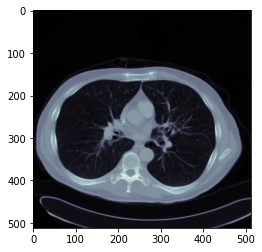

In [9]:
ct = dicom_file.pixel_array
plt.figure()
plt.imshow(ct, cmap='bone') # 'gray'

In [14]:
path_to_head_mri = Path('../input/head-mri/SE000001')
all_files = list(path_to_head_mri.glob('*'))

In [15]:
all_files[:5]

[PosixPath('../input/head-mri/SE000001/MR000023'),
 PosixPath('../input/head-mri/SE000001/MR000006'),
 PosixPath('../input/head-mri/SE000001/MR000007'),
 PosixPath('../input/head-mri/SE000001/MR000016'),
 PosixPath('../input/head-mri/SE000001/MR000013')]

In [16]:
mri_data = [pydicom.read_file(path) for path in all_files]

In [18]:
for slice in mri_data[:5]:
    print(slice.SliceLocation)

137.999998321624
35.9999959546749
41.9999963629367
95.9999960937442
77.9999962275740


In [19]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation)
for slice in mri_data_ordered[:5]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [20]:
full_volume = [slice.pixel_array for slice in mri_data_ordered]

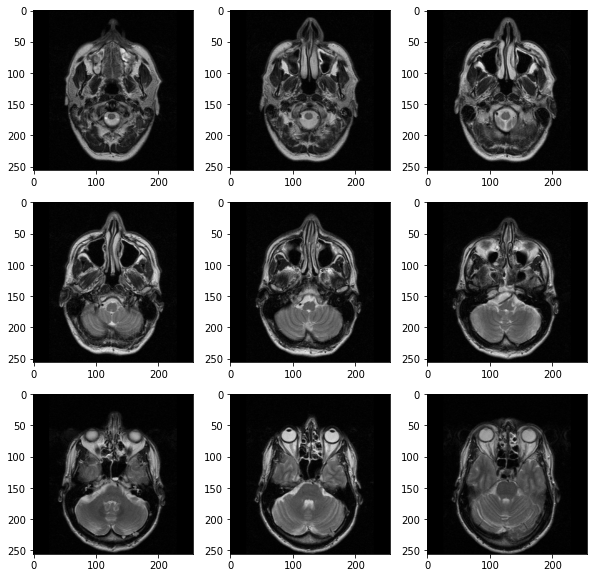

In [22]:
fig, axis = plt.subplots(3, 3, figsize=(10,10))

slice_counter = 0

for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[slice_counter], cmap='gray')
        slice_counter+=1

### Using SimpleITK

In [24]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [26]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
print(series_file_names)

('../input/head-mri/SE000001/MR000000', '../input/head-mri/SE000001/MR000001', '../input/head-mri/SE000001/MR000002', '../input/head-mri/SE000001/MR000003', '../input/head-mri/SE000001/MR000004', '../input/head-mri/SE000001/MR000005', '../input/head-mri/SE000001/MR000006', '../input/head-mri/SE000001/MR000007', '../input/head-mri/SE000001/MR000008', '../input/head-mri/SE000001/MR000009', '../input/head-mri/SE000001/MR000010', '../input/head-mri/SE000001/MR000011', '../input/head-mri/SE000001/MR000012', '../input/head-mri/SE000001/MR000013', '../input/head-mri/SE000001/MR000014', '../input/head-mri/SE000001/MR000015', '../input/head-mri/SE000001/MR000016', '../input/head-mri/SE000001/MR000017', '../input/head-mri/SE000001/MR000018', '../input/head-mri/SE000001/MR000019', '../input/head-mri/SE000001/MR000020', '../input/head-mri/SE000001/MR000021', '../input/head-mri/SE000001/MR000022', '../input/head-mri/SE000001/MR000023', '../input/head-mri/SE000001/MR000024', '../input/head-mri/SE000

In [27]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [31]:
image_data = series_reader.Execute()

In [32]:
head_mri = sitk.GetArrayFromImage(image_data)
head_mri.shape

(27, 256, 256)

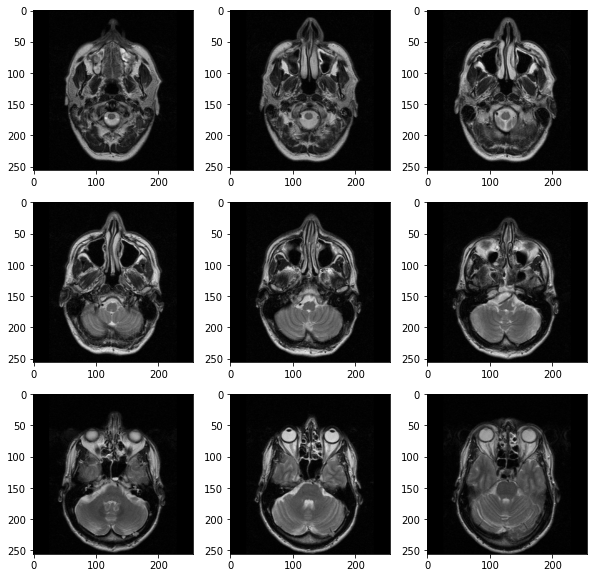

In [33]:
fig, axis = plt.subplots(3, 3, figsize=(10,10))

slice_counter = 0

for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[slice_counter], cmap='gray')
        slice_counter+=1

# NifTi

In [ ]:
! pip install dicom2nifti

In [ ]:
import dicom2nifti
import nibabel as nib
import matplotlib.pyplot as plt

In [6]:
path_to_dicom = "../input/head-mri/SE000001"

In [8]:
dicom2nifti.convert_directory(path_to_dicom,"./")

In [10]:
nifti = nib.load('./201_t2w_tse.nii.gz')

In [12]:
print(nifti)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine: 
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

In [14]:
nifti.header['qoffset_x']

array(115.27232, dtype=float32)

In [15]:
nifti.shape

(256, 256, 27)

In [16]:
image_array = nifti.get_fdata()

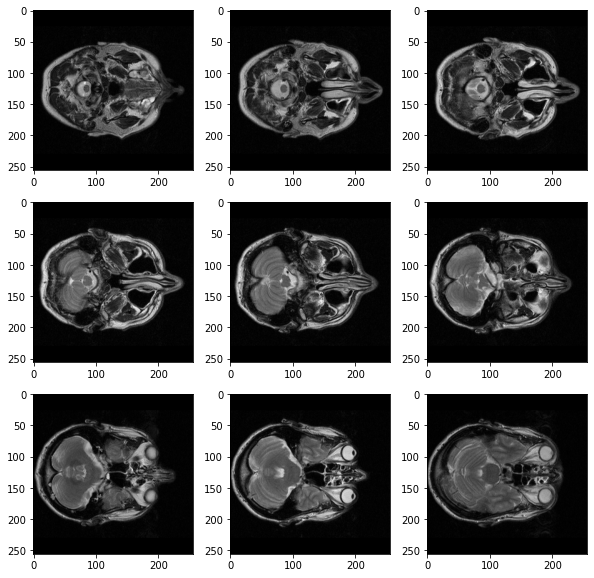

In [17]:
fig, axis = plt.subplots(3,3, figsize=(10,10))
slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(image_array[:, :, slice_counter], cmap='gray')
        slice_counter += 1

In [18]:
image_array_processed = image_array * (image_array > 300)

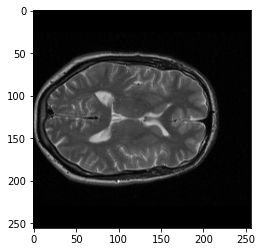

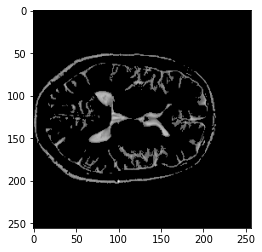

In [19]:
plt.figure()
plt.imshow(image_array[:, :, 13], cmap='gray')

plt.figure()
plt.imshow(image_array_processed[:, :, 13], cmap='gray')

In [21]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)

In [22]:
nib.save(processed_nifti, "./201_t2w_tse_processed.nii.gz")

# Preprocessing

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import nibabel.processing

In [28]:
brain_mri = nib.load('../input/head-mri/IXI662-Guys-1120-T1.nii/IXI662-Guys-1120-MPRAGESEN_-s455_-0301-00003-000001-01.nii')
brain_mri_data = brain_mri.get_fdata()

In [29]:
affine = brain_mri.affine
shape = brain_mri.shape

In [30]:
print(affine)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [31]:
shape

(256, 256, 150)

In [32]:
# size of voxel in all directions (in mm)
brain_mri.header.get_zooms()

(0.9375, 0.9375, 1.2000039)

In [33]:
# orientation (end of body axis) 
nib.aff2axcodes(affine) # anterior to posterior (coronial), inferior to superior (axial), left to right (sagittal)

('P', 'S', 'R')

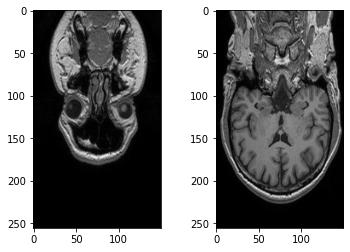

In [34]:
# slice through 1 axis
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[40, :, :], cmap='gray')
axis[1].imshow(brain_mri_data[120, :, :], cmap='gray')

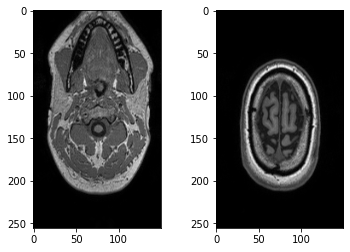

In [35]:
# slice through 2 axis
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:, 30, :], cmap='gray')
axis[1].imshow(brain_mri_data[:, 200, :], cmap='gray')

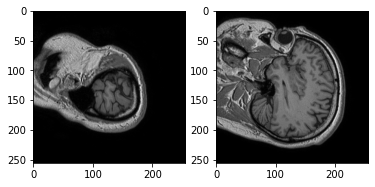

In [36]:
# slice through 3 axis
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:, :, 20], cmap='gray')
axis[1].imshow(brain_mri_data[:, :, 45], cmap='gray')

In [37]:
voxel_coords = np.array((0, 0, 0, 1))
physical_coords = affine @ voxel_coords # matrix multiplication in numpy

In [38]:
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [39]:
affine[:, 3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

In [40]:
voxel_coords_manual = np.array((0, 0, 0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3, 3]
physical_coords_manual

array([ -90.67985535,  102.82944489, -114.82378387])

In [ ]:
physical_coords  = [ -90.67985535,  102.82944489, -114.82378387]
(np.linalg.inv(affine) @ physical_coords).round()

In [46]:
# resampling
print(brain_mri.shape)
print(brain_mri.header.get_zooms())

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)


In [54]:
voxel_size = (2, 2, 2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128, 128, 128), voxel_size, orientation="PSR")
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [55]:
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(128, 128, 128)
(2.0, 2.0, 2.0)


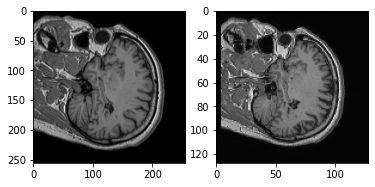

In [56]:
fig, axis = plt.subplots(1, 2)
axis[0].imshow(brain_mri_data[:, :, 50], cmap='gray')
axis[1].imshow(brain_mri_resized_data[:, :, 50], cmap='gray')

In [ ]:
# normalization and standardization

lung_ct = nibabel.load('../input/head-mri/lung_043.nii')
lung_ct_data = lung_ct.get_fdata()

In [ ]:
lung_ct_data_std = lung_ct_data / 3017

In [ ]:
plt.figure()
plt.imshow(np.rot90(lung_ct_data_std[:,:, 50]), cmap='bone')

In [ ]:
lung_ct_lung_window = np.clip(lung_ct_data, -1000, -500)
plt.figure()
plt.imshow(np.rot90(lung_ct_lung_window[:,:, 50]), cmap='bone')

In [ ]:
lung_ct_soft_tissue_window = np.clip(lung_ct_data, -250, 250)
plt.figure()
plt.imshow(np.rot90(lung_ct_soft_tissue_window[:, :, 5]), cmap='gray')

In [ ]:
cardiac_mri = nib.load('../input/head-mri/la_003.nii')
cardiac_mri_data = cardiac_mri.get_fdata()

In [ ]:
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_norm = (cardiac_mri_data - mean) / std # z-normalization
cardiac_mri_std = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (np.max(cardiac_mri_norm) - np.min(cardiac_mri_norm))

In [ ]:
np.mean(cardiac_mri_std), np.min(cardiac_mri_std), np.max(cardiac_mri_std)

In [ ]:
plt.figure()
plt.imshow(cardiac_mri_std[:, :, 30], cmap='gray')